In [1]:
# Data Collection

!pip3 install -r '../../requirements.txt'

import kaggle
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from datetime import datetime
from PIL import Image, ImageStat
from PIL.ExifTags import TAGS
from scipy.spatial import KDTree
from webcolors import (
    CSS3_HEX_TO_NAMES,
    hex_to_rgb,
)

def get_predominant_colors(image_file, numcolors=3, resize=150, output = []):
    # Resize image to speed up processing
    img = Image.open(image_file)
    img = img.copy()
    img.thumbnail((resize, resize))
 
    # Reduce to palette
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=numcolors)
 
    # Find dominant colors
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    colors = list()
    for i in range(numcolors):
        palette_index = color_counts[i][1]
        dominant_color = palette[palette_index*3:palette_index*3+3]
        colors.append(tuple(dominant_color))
    return colors

def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []    
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    kdt_db = KDTree(rgb_values)    
    distance, index = kdt_db.query(rgb_tuple)
    return {
        "index":int(index),
        "name":names[index]
    }

In [2]:
### 1. Create two folders : images, metadata.
!mkdir -p ./images
!mkdir -p ./metadata

In [3]:
## You have to collect and download a set of images. You have the following tasks to program, automating the process as much as possible:

### 1. Download open-licensed images to the folder images (minimum 100 images).
!rm -f ./images/pexels-mountain-images.zip
!kaggle datasets download -d nielspace/pexels-mountain-images -p ./images --unzip
print("Dataset downloaded")


401 - Unauthorized
Dataset downloaded


In [4]:
### 2. Save metadata of every image like image size, image format (.jpeg, .png, etc.), image orientation (landscape, portrait, square, etc.), creation date, camera model, etc. in one or more JSON files. You can make use of the Exif information present in the image files.

directory = './images/Mountain'
metadata = {}
orientation = ""
images_data =[]
for filename in os.listdir(directory):

    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        image_data = {}
        path, file_extension = os.path.splitext(f)
        time_creation = os.path.getmtime(f)
        im = Image.open(f)
        size = im.size
        colors = {}
        predominant_colors = get_predominant_colors(directory + "/" + filename)
        colors["predominant_colors"] = []
        for predominant_color in predominant_colors:
            colors["predominant_colors"].append(convert_rgb_to_names(predominant_color))
        for idx,val in enumerate(["red","green","blue"]):
            colors[val] = Image.Image.getextrema(im)[idx]
            colors[val] = colors[val] + (ImageStat.Stat(im).median[idx],)
        if size[0]>size[1] :
            orientation = "landscape"
        elif size[0] == size[1] :
            orientation = "square"
        else :
            orientation = "portrait"
        metadata[filename] = {
            "file_extension": file_extension,
            "creation_date": datetime.fromtimestamp(time_creation/1000.0).strftime("%m/%d/%Y, %H:%M:%S"),
            "size": {
                "width":size[0],
                "height":size[1]
            },
            "orientation": orientation,
            "colors": {
                "predominant_colors":{
                    "first_color":{
                        "index":colors["predominant_colors"][0]["index"],
                        "name":colors["predominant_colors"][0]["name"]
                    },
                    "second_color":{
                        "index":colors["predominant_colors"][1]["index"],
                        "name":colors["predominant_colors"][1]["name"]
                    },
                    "third_color":{
                        "index":colors["predominant_colors"][2]["index"],
                        "name":colors["predominant_colors"][2]["name"]
                    },
                },
                "red": {
                    "minimum":colors["red"][0],
                    "maximum":colors["red"][1],
                    "median":colors["red"][2]
                },
                "green": {
                    "minimum":colors["green"][0],
                    "maximum":colors["green"][1],
                    "median":colors["green"][2]
                },
                "blue": {
                    "minimum":colors["blue"][0],
                    "maximum":colors["blue"][1],
                    "median":colors["blue"][2]
                }
            }
        }
        print(metadata[filename])


with open("./metadata/metadata.json", "w") as outfile:
    json.dump(metadata, outfile, indent=4)

{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 3264, 'height': 4759}, 'orientation': 'portrait', 'colors': {'predominant_colors': {'first_color': {'index': 34, 'name': 'darkslategray'}, 'second_color': {'index': 72, 'name': 'lightslategray'}, 'third_color': {'index': 120, 'name': 'silver'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 115}, 'green': {'minimum': 0, 'maximum': 255, 'median': 122}, 'blue': {'minimum': 0, 'maximum': 255, 'median': 129}}}
{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 3448, 'height': 4592}, 'orientation': 'portrait', 'colors': {'predominant_colors': {'first_color': {'index': 34, 'name': 'darkslategray'}, 'second_color': {'index': 121, 'name': 'skyblue'}, 'third_color': {'index': 66, 'name': 'lightgray'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 93}, 'green': {'minimum': 0, 'maximum': 255, 'median': 158}, 'blue': {'minimum': 0, 'maximum': 255, 'median': 174}}}
{'file_ex

{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 5472, 'height': 3648}, 'orientation': 'landscape', 'colors': {'predominant_colors': {'first_color': {'index': 39, 'name': 'dimgray'}, 'second_color': {'index': 23, 'name': 'darkgray'}, 'third_color': {'index': 120, 'name': 'silver'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 162}, 'green': {'minimum': 0, 'maximum': 252, 'median': 144}, 'blue': {'minimum': 0, 'maximum': 245, 'median': 135}}}
{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 2000, 'height': 3000}, 'orientation': 'portrait', 'colors': {'predominant_colors': {'first_color': {'index': 34, 'name': 'darkslategray'}, 'second_color': {'index': 120, 'name': 'silver'}, 'third_color': {'index': 23, 'name': 'darkgray'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 176}, 'green': {'minimum': 0, 'maximum': 255, 'median': 160}, 'blue': {'minimum': 0, 'maximum': 255, 'median': 163}}}
{'file_extension': '.

{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 3648, 'height': 5472}, 'orientation': 'portrait', 'colors': {'predominant_colors': {'first_color': {'index': 90, 'name': 'mistyrose'}, 'second_color': {'index': 90, 'name': 'mistyrose'}, 'third_color': {'index': 112, 'name': 'rosybrown'}}, 'red': {'minimum': 27, 'maximum': 255, 'median': 248}, 'green': {'minimum': 29, 'maximum': 245, 'median': 212}, 'blue': {'minimum': 42, 'maximum': 245, 'median': 211}}}
{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 3605, 'height': 5438}, 'orientation': 'portrait', 'colors': {'predominant_colors': {'first_color': {'index': 27, 'name': 'darkolivegreen'}, 'second_color': {'index': 58, 'name': 'lavender'}, 'third_color': {'index': 66, 'name': 'lightgray'}}, 'red': {'minimum': 11, 'maximum': 255, 'median': 170}, 'green': {'minimum': 6, 'maximum': 253, 'median': 157}, 'blue': {'minimum': 0, 'maximum': 252, 'median': 150}}}
{'file_ex

{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 5472, 'height': 3648}, 'orientation': 'landscape', 'colors': {'predominant_colors': {'first_color': {'index': 39, 'name': 'dimgray'}, 'second_color': {'index': 121, 'name': 'skyblue'}, 'third_color': {'index': 109, 'name': 'powderblue'}}, 'red': {'minimum': 6, 'maximum': 255, 'median': 121}, 'green': {'minimum': 5, 'maximum': 255, 'median': 199}, 'blue': {'minimum': 0, 'maximum': 255, 'median': 215}}}
{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 3648, 'height': 5472}, 'orientation': 'portrait', 'colors': {'predominant_colors': {'first_color': {'index': 126, 'name': 'steelblue'}, 'second_color': {'index': 45, 'name': 'gainsboro'}, 'third_color': {'index': 73, 'name': 'lightsteelblue'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 148}, 'green': {'minimum': 0, 'maximum': 255, 'median': 188}, 'blue': {'minimum': 0, 'maximum': 255, 'median': 201}}}
{'file_exten

{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 3000, 'height': 1994}, 'orientation': 'landscape', 'colors': {'predominant_colors': {'first_color': {'index': 23, 'name': 'darkgray'}, 'second_color': {'index': 39, 'name': 'dimgray'}, 'third_color': {'index': 120, 'name': 'silver'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 158}, 'green': {'minimum': 12, 'maximum': 254, 'median': 163}, 'blue': {'minimum': 21, 'maximum': 223, 'median': 160}}}
{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 6000, 'height': 3376}, 'orientation': 'landscape', 'colors': {'predominant_colors': {'first_color': {'index': 78, 'name': 'maroon'}, 'second_color': {'index': 27, 'name': 'darkolivegreen'}, 'third_color': {'index': 119, 'name': 'sienna'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 93}, 'green': {'minimum': 0, 'maximum': 255, 'median': 52}, 'blue': {'minimum': 0, 'maximum': 255, 'median': 43}}}
{'file_extension': '.j

{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 6000, 'height': 4000}, 'orientation': 'landscape', 'colors': {'predominant_colors': {'first_color': {'index': 62, 'name': 'lightblue'}, 'second_color': {'index': 73, 'name': 'lightsteelblue'}, 'third_color': {'index': 72, 'name': 'lightslategray'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 166}, 'green': {'minimum': 0, 'maximum': 254, 'median': 193}, 'blue': {'minimum': 6, 'maximum': 255, 'median': 220}}}
{'file_extension': '.jpg', 'creation_date': '01/20/1970, 02:54:54', 'size': {'width': 6000, 'height': 4000}, 'orientation': 'landscape', 'colors': {'predominant_colors': {'first_color': {'index': 39, 'name': 'dimgray'}, 'second_color': {'index': 68, 'name': 'lightpink'}, 'third_color': {'index': 90, 'name': 'mistyrose'}}, 'red': {'minimum': 0, 'maximum': 255, 'median': 213}, 'green': {'minimum': 10, 'maximum': 255, 'median': 169}, 'blue': {'minimum': 12, 'maximum': 255, 'median': 175}}}
{'file

In [5]:
# Labeling and Annotation

directory = './images/Mountain'
data_path = "./metadata/metadata.json"


if os.path.isfile(data_path):
    with open(data_path) as target:
        json_data = json.load(target)
        
for filename in os.listdir(directory) :
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        tags = {}
        tags["like"] = random.randint(0,100)
        tags["hashtag"] = "moutain"
        json_data[filename]["tags"] = tags
        
with open("./metadata/metadata.json", "w") as outfile:
    json.dump(json_data, outfile, indent=4)

In [6]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Data Analyses

numb_users = 1
directory = './images/Mountain'
data_path = "./metadata/metadata.json"
rand = 0

# json_data represents the metadata for each file
if os.path.isfile(data_path):
    with open(data_path) as target:
        json_data = json.load(target)
# Creating a profile for users with liked images
def create_user_profiles(json_data, directory):
    result = {}
    method_names = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            methods = [
                {
                    "name": "rand",
                    "conditions":[ 
                        {
                        "lambda":lambda input_array : random.randint(input_array[0],input_array[1]) == input_array[2],
                        "variables": [1,5,1]
                        }
                    ]
                },
                {
                    "name": "orientation",
                    "conditions":[ 
                        {
                        "lambda":lambda input_array : input_array[0] == input_array[1],
                        "variables": [json_data[filename]["orientation"],"landscape"]
                        }
                    ]
                },
                {
                    "name": "colors",
                    "conditions":[
                        {
                            "lambda":lambda input_array : input_array[0] >= input_array[1],
                            "variables": [json_data[filename]["colors"]["blue"]["median"],155]
                        }
                    ]
                }
            ]
            for method in methods:
                if method["name"] not in result.keys():
                    result[method["name"]] = []
                    method_names.append(method["name"])
                conditions_verified = True
                for condition in method["conditions"]:
                    conditions_verified = conditions_verified and condition["lambda"](condition["variables"])
                if conditions_verified:
                    result[method["name"]].append(filename)
    return (result,method_names)

profiles, method_names = create_user_profiles(json_data, directory)
print("METHOD NAMES: " + ','.join(method_names))
for profile in profiles:
    print(f"PROFILE(S):\n\t" +
    profile.upper()+":\n" +
    ','.join(profiles[profile]))

METHOD NAMES: rand,orientation,colors
PROFILE(S):
	RAND:
pexels-alessio-cesario-1906794.jpg,pexels-aron-visuals-1643113.jpg,pexels-benjamin-suter-3733269.jpg,pexels-brandon-montrone-1374295.jpg,pexels-eberhard-grossgasteiger-1021808.jpg,pexels-eberhard-grossgasteiger-1146642.jpg,pexels-eberhard-grossgasteiger-1428277.jpg,pexels-eberhard-grossgasteiger-1624438.jpg,pexels-eberhard-grossgasteiger-1699021.jpg,pexels-eberhard-grossgasteiger-1743401.jpg,pexels-eberhard-grossgasteiger-2310641.jpg,pexels-eberhard-grossgasteiger-976917.jpg,pexels-jarod-lovekamp-3791466.jpg,pexels-markus-spiske-143577.jpg,pexels-nur-andi-ravsanjani-gusma-1208379.jpg,pexels-snapwire-37728.jpg,pexels-stephan-seeber-1054289.jpg,pexels-stephan-seeber-1130847.jpg
PROFILE(S):
	ORIENTATION:
pexels-archie-binamira-913215.jpg,pexels-ashan-rai-2085998.jpg,pexels-balamurugan-anbazhagan-763097.jpg,pexels-billel-moula-540518.jpg,pexels-brandon-montrone-1374295.jpg,pexels-denis-linine-714258.jpg,pexels-dev-patel-250400.jpg,pe

In [7]:
# Creating dataframes to predict what the user might like

def get_result_dataframe_per_profile(data, profile_user):
    result = []
    for i in data:
        if i in profile_user:
            result.append('Favorite')
        else:
            result.append('NotFavorite')
    return pd.DataFrame(result, columns=['Liked'])

def get_dataframe_learning(data):
    res = []
    for i in data:        
        res.append([data[i]["colors"]["predominant_colors"]["first_color"]["index"],
                  data[i]["colors"]["predominant_colors"]["second_color"]["index"],
                  data[i]["colors"]["predominant_colors"]["third_color"]["index"],
                  data[i]["colors"]["red"]["median"],
                  data[i]["colors"]["green"]["median"],
                  data[i]["colors"]["blue"]["median"],
                  data[i]["orientation"], 
                  data[i]["size"]["width"],
                  data[i]["size"]["height"]
                 ])
    return pd.DataFrame(res, columns=['First color', 'Second color', 'Third color', 'Median Red', 'Median Green', 'Median Blue','Orientation', 'Width', 'Height'])
    
def get_model(model, df, rf):
    if (model == "dtc"):
        res = tree.DecisionTreeClassifier()
        res = res.fit(df, rf.values.ravel())
    elif (model == "rfc"):
        res = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
        res = res.fit(df, rf.values.ravel())
    return res

def get_dataframe_prediction(data, label_encoder):
    res = []
    for j in data :
         res.append([
             data[j]["colors"]["predominant_colors"]["first_color"]["index"],
             data[j]["colors"]["predominant_colors"]["second_color"]["index"],
             data[j]["colors"]["predominant_colors"]["third_color"]["index"],
             data[j]["colors"]["red"]["median"],
             data[j]["colors"]["green"]["median"],
             data[j]["colors"]["blue"]["median"],
             label_encoder.transform([data[j]["orientation"]])[0],
             data[j]["size"]["width"],
             data[j]["size"]["height"]
             ])
    return res

def get_prediction(method_object, label_encoder, json_data_prediction):
    prediction = method_object.predict(get_dataframe_prediction(json_data_prediction, label_encoder)) 
    return prediction

## Taking the first two thirds of our dataset to train our algorithm, and the last third to test the model
json_data_learning = dict(list(json_data.items())[:len(json_data)*2//3])
json_data_predicting = dict(list(json_data.items())[len(json_data)*2//3:])

resultframes,dtc,predictions_dtc,rfc,predictions_rfc,result_all_images, liked_encoders = [{} for _ in range(7)]

## Creating dataframe and resultframe for learning
dataframe = get_dataframe_learning(json_data_learning)

## Generating numerical labels for column that need it
le1 = LabelEncoder()
dataframe['Orientation'] = le1.fit_transform(dataframe['Orientation'])

for method in method_names:
    resultframes[method]=get_result_dataframe_per_profile(json_data_learning,profiles[method])
    # Create liked encoder for result dataframe
    liked_encoders[method] = LabelEncoder()
    resultframes[method]['Liked'] = liked_encoders[method].fit_transform(resultframes[method]['Liked'])
    # Create Decision Tree Clasifier model and get predictions
    dtc[method] = get_model("dtc", dataframe.values, resultframes[method])
    predictions_dtc[method] = get_prediction(dtc[method], le1, json_data_predicting)
    
    # Create Random Forest Clasifier model and get predictions
    rfc[method] = get_model("rfc", dataframe.values, resultframes[method])
    predictions_rfc[method] = get_prediction(rfc[method], le1, json_data_predicting)
    
    result_all_images[method] =  liked_encoders[method].inverse_transform(predictions_rfc[method])
    #
    result_all_images[method] = get_result_dataframe_per_profile(json_data, profiles[method])
    print(f"{method.upper()}: \n\t"+ 
          f"Decision Tree Classifier: \n\t\t" +
          f"ACCURACY: {accuracy_score(liked_encoders[method].transform(result_all_images[method][len(result_all_images[method])*2//3:]), predictions_dtc[method])}\n\t\t" +
          f"FEATURE IMPORTANCES:{dtc[method].feature_importances_}\n\t" +
          f"Random Forest Classifier: \n\t\t" +
          f"ACCURACY: {accuracy_score(liked_encoders[method].transform(result_all_images[method][len(result_all_images[method])*2//3:]), predictions_rfc[method])}\n\t\t" +
          f"FEATURE IMPORTANCES:{rfc[method].feature_importances_}")
    
# find test split pr sklearn ça découpe les dataset automatiquement
# skleanr accuracy score pour ce que j'ai fait au desssus mais en mieux

RAND: 
	Decision Tree Classifier: 
		ACCURACY: 0.7352941176470589
		FEATURE IMPORTANCES:[0.         0.1880627  0.         0.06871795 0.21700761 0.21339123
 0.         0.20615385 0.10666667]
	Random Forest Classifier: 
		ACCURACY: 0.9117647058823529
		FEATURE IMPORTANCES:[0.03646553 0.12294615 0.07991354 0.02858565 0.29536399 0.1333145
 0.12785227 0.06824188 0.10731648]
ORIENTATION: 
	Decision Tree Classifier: 
		ACCURACY: 1.0
		FEATURE IMPORTANCES:[0. 0. 0. 0. 0. 0. 1. 0. 0.]
	Random Forest Classifier: 
		ACCURACY: 1.0
		FEATURE IMPORTANCES:[0.         0.03337922 0.01709184 0.01977594 0.00974066 0.
 0.54272664 0.20137234 0.17591335]
COLORS: 
	Decision Tree Classifier: 
		ACCURACY: 1.0
		FEATURE IMPORTANCES:[0. 0. 0. 0. 0. 1. 0. 0. 0.]
	Random Forest Classifier: 
		ACCURACY: 1.0
		FEATURE IMPORTANCES:[0.02672794 0.00070712 0.00699645 0.04437736 0.55085959 0.36160478
 0.         0.         0.00872675]


/home/florent/MachineLearningProject/env/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/florent/MachineLearningProject/env/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/florent/MachineLearningProject/env/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/florent/MachineLearningProject/env/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConve

{'rand': [], 'orientation': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 18, 19, 20, 22, 23, 28, 29, 31, 32], 'colors': [1, 4, 6, 8, 14, 17, 18, 19, 20, 22, 23, 25, 28, 29, 32, 33]}


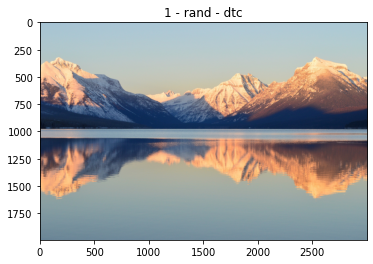

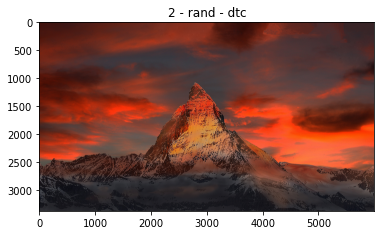

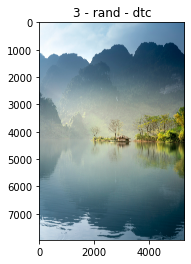

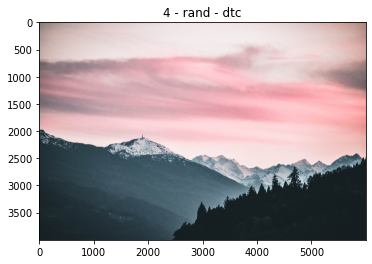

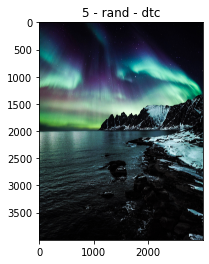

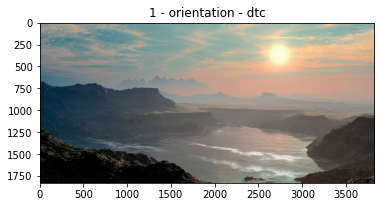

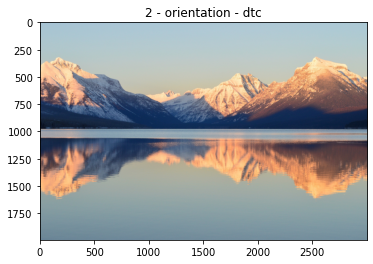

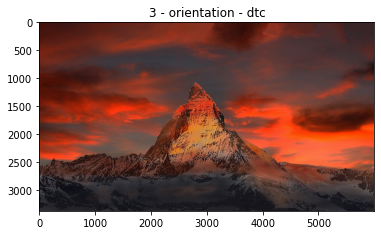

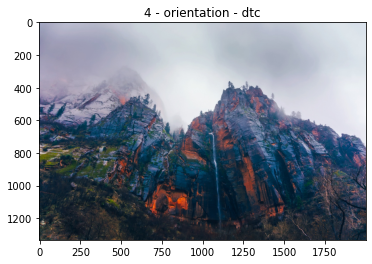

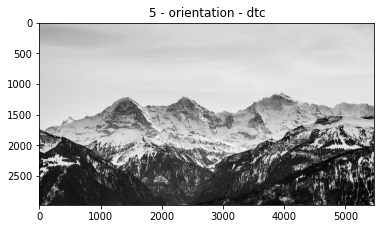

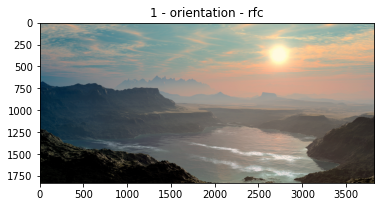

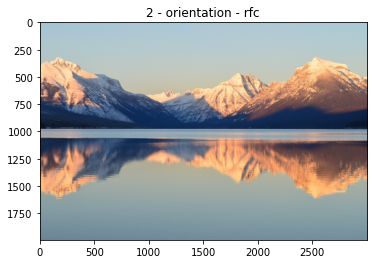

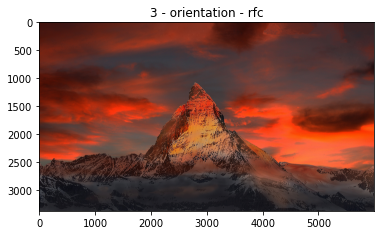

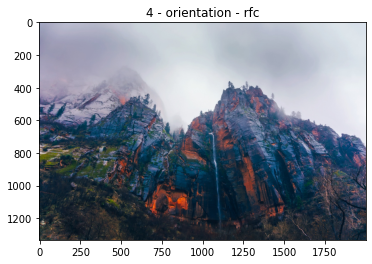

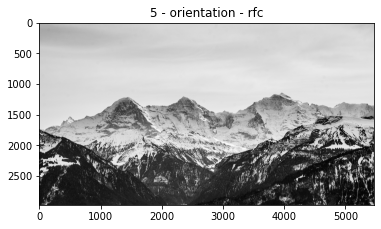

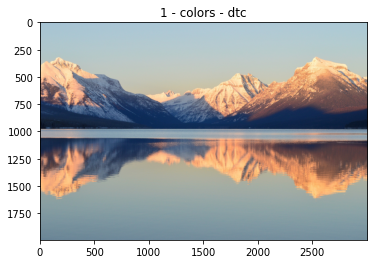

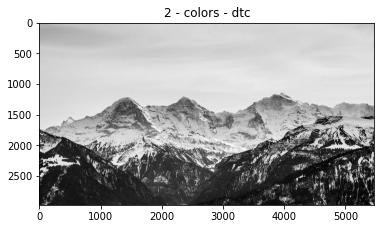

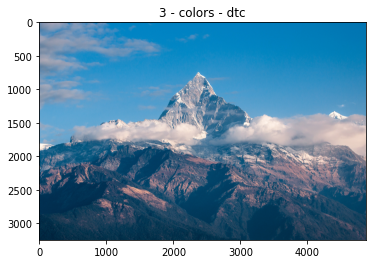

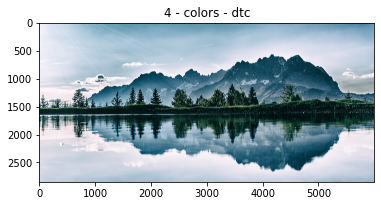

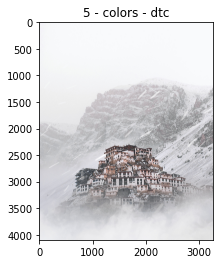

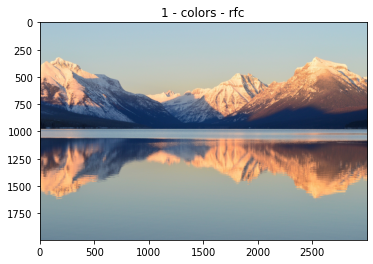

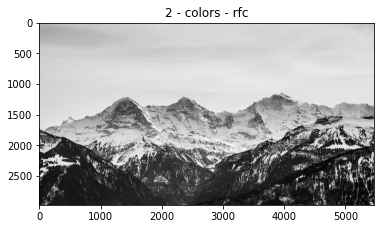

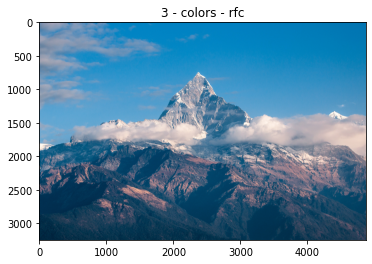

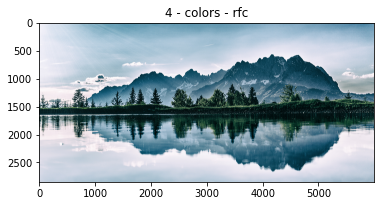

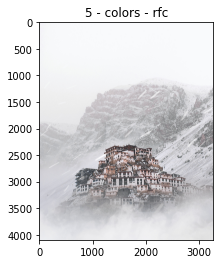

In [ ]:
from collections import OrderedDict
def print_predicted_images(json_data_list, list_indexes, methodName, algoName, nb_images_to_display = 5):
    i=1
    for index in list_indexes:
        if i<=nb_images_to_display:
            img = mpimg.imread(directory+"/"+json_data_list[index])
            imgplot = plt.imshow(img)
            plt.title(f"{i} - {methodName} - {algoName}")
            plt.show()
        else:
            break
        i+=1
        
def get_indexes_methods(predictions):
    indexes = {}
    for method in method_names:
        indexes[method] = []
        for index in range(len(predictions[method])):
            if predictions[method][index] == 0:
                indexes[method].append(index)
    return indexes

#Print images predicted by ML algorithms
json_data_list = list(json_data.keys())[len(json_data)*2//3:]


indexes_methods_dtc = get_indexes_methods(predictions_dtc)
indexes_methods_rfc = get_indexes_methods(predictions_rfc)

for method in method_names:
    print_predicted_images(json_data_list,indexes_methods_dtc[method],method,"dtc")
    print_predicted_images(json_data_list,indexes_methods_rfc[method],method,"rfc")